<a href="https://colab.research.google.com/github/Wandergarten/CollectoR/blob/main/%5BDLR%5D_IntroductionToNeuralNetworksCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## A single neuron

Assume we have a 2-input neuron:
![alt text](https://github.com/DLR-SC/Neural-Network-Tutorial/raw/master/images/2Input_neruon.png)

    
with weights $\pmb{w}=[w_1,w_2]$ and bias $b$ and a sigmoid activation function $f =1 / (1 + e^{-x})$.<br/>


For a quick calculation example, we will set $w = [0,1]$ and $b=4$.
Now the output for an input $[x_1, x_2] = [2,3]$ is calculated as follows:
<ol>
<li><p> Calculate weighted sum, adding the bias (in vector notation using the dot product) 
<p>    $\Sigma = \pmb{w}\cdot \pmb{x} + b = (x_1 * w_1)+(x_2 * w_2) + b \\
            = 0*2 + 1*3 + 4\\
            = 7$</li>
<li><p> Pass the weighted sum through the activation function
    <p> $y = f(\Sigma)\\
       = f(7) = 0.999$</li>
</ol>


Implementing this simple *perceptron* in python (using numpy) is fairly simple: 

In [ ]:
def sigmoid(x):
  # Activation function
  return 1 / (1 + np.exp(-x))

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total) 

In [ ]:
# Let's run the example from above weights = [0,1] , bias = 4,  x = [2,3]
weights = np.array([0, 1]) 
bias = 4                   
n = Neuron(weights, bias)

x = np.array([2, 3])      
n.feedforward(x)

0.9990889488055994

The process of running an input through the neurons in a network is known as __feed forward__.

## A neural network
Now lets move to more complexity and add *hidden layers*, to build a complete neural network.  
A simple network with an input layer with 2 input neurons, 1 hidden layer with 2 neurons ($\pmb{h}=[h_1,h_2]$) and an outputlayer with one neuron  might look like this:
![alt text](https://github.com/DLR-SC/Neural-Network-Tutorial/raw/master/images/SimpleNetwork.png)



If we go back to our previous example and asume that all neurons have again the same weights $\pmb{w^{(0)}}=\pmb{w^{(1)}} = [0, 1] $ and the biases are zero ($b_1 = b_2 = b_3 = 0$), running our previous input $\pmb{x}=[2,3]$ through the network is straight forward:   
<br>
$h_1 = h_2 = f(\pmb{w}\cdot \pmb{x}+b)\\
= f((0*2)+(1*3)+0)\\
= f(3)\\
=0.9526$</br>

$o_1 = f(\pmb{w}\cdot \pmb{h}+b)\\
= f((0*h_1)+(1*h_2)+0
= f(0.95266)\\
=0.7216$

In [ ]:
class ExampleNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

In [ ]:
#Run feed forward on x
ex_network = ExampleNeuralNetwork()
x = np.array([2, 3])
ex_network.feedforward(x)

0.7216325609518421

## Loss

Evaluation of the outcome $y_{pred}$ of a network is done via the __Lossfunction__. There are many ways to define the loss, one is via the *mean square error*  
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_{true} - y_{pred})^2$$
withn $n$ being the number of samples and $y$ the variable to be predicted (i.e. the outcome of the network).
The goal in training a neural network is _minimizing the loss_ by adjusting the weights and biases.

In [ ]:
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

## Training a neural network

Assume we have the following measurements, where the output vector [male, female] is represented by [0,1].

| Name   | Weight [kg ] | Height [cm] | Gender |
|--------|--------|-------|--------|
|Susan   | 51     | 160  |   f = 1   |
|Max     | 72     | 178  |   m = 0   |
|Lucy    | 68     | 175  |   f = 1   |
|Pete    | 71     | 182  |   m = 0   |
|Paul    | 90     | 194  |   m = 0   |  

Given that data, we want to predict someone’s gender given their weight and height. In order to do so, we'll train the simple 2 input network from above, that has one hidden layer with 2 neurons, and a single output :
![alt text](https://github.com/DLR-SC/Neural-Network-Tutorial/raw/master/images/SimpleNetwork2.png)

$$h_1 = f(\pmb{w^{(1)}}\cdot \pmb{x}+b_1) = f(w_1*x_1 + w_2*x_2 +b_1)$$

$$h_2 = f(\pmb{w^{(2)}}\cdot \pmb{x}+b_2) = f(w_3*x_1 + w_4*x_2 +b_2)$$

$$y_{pred} = o = f(\pmb{w^{(h)}}\cdot \pmb{h} +b_3) = f(w_5*h_1+w_6 *h_2 +b_3)$$



In [ ]:
class FeedForwardNetwork:
  def __init__(self, weights1,weights2, weightsh, bias1,bias2, bias3):
    
    self.h1 = Neuron(weights1, bias1)
    self.h2 = Neuron(weights2, bias2)
    self.o1 = Neuron(weightsh, bias3)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1
    

As an example let's have a look at a loss if the network predicts all participants are male. Then the network outputs 0 for all gender predictions and the loss yields:  
$$MSE = \frac{1}{5} ((1-0)^2 + (0-0)^2 + (1-0)^2 + (0-0)^2 + (0-0)^2) = \frac{2}{5} = 0.4 $$

In [ ]:
#Let's calculate the loss
ytrue = np.array([1,0,1,0,0])
ypred = np.array([0,0,0,0,0])
mse_loss(ytrue, ypred)

0.4

### Feed Forward
Now let's look at the example above and set all the weights to 1 and all the biases to 0, i.e. 
$$\pmb{w^{(1)}}=\pmb{w^{(2)}}= \pmb{w^{(h)}}= [1, 1]\quad b_1=b_2=b_3 = 0$$ 

In [ ]:
weights1 = weights2 = weightsh = np.array([1, 1])
bias1 = bias2 = bias3 = 0

Let's assume that we have just one dataset in our network, since this simplifies things for illustration of the next steps. For easier calculation, the data is shifted by subtraction of $60 kg$ from the weight and $170 cm$ from the height:  

| Name   | Weight [kg]<br>(minus 60)  | Height [cm]<br>(minus 170)| Gender |
|--------|--------|-------|--------|
|Susan   | -9     | -10  |   1    |

Feed-forward of for example the input "Susan"  $x=[-9,-10]$ through the network yields:
$$h_1 = f(\pmb{w^{(1)}}\cdot \pmb{x}+b_1), \: h_2 = f(\pmb{w^{(2)}}\cdot \pmb{x}+b_2)$$

$$h_1 = h_2 = f(1*(-9) + 1*(-10) +0)= f(-19) = 5.603*10^{-9}$$

$$y_{pred} = o = f(\pmb{w^{(h)}}\cdot \pmb{h} +b_3) = f(w_5*h_1+w_6 *h_2 +b_3)\\
= f(1*5.603 *10^{-9} + 1*5.603*10^{-9} +0)\approx 0.5$$

In [ ]:
# Feed forward Susan
susan = np.array([-9,-10])

network1 = FeedForwardNetwork(weights1,weights2, weightsh, bias1,bias2, bias3)
network1.feedforward(susan)

0.5000000028013982

### Backpropagation

In order to minimize the loss, we look at it in terms of a multivariate function of $w$ and $b$: 
$$L (w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$$  
<br>


Then the loss with respect to a certain predicted value is just:
$$L = \frac{1}{1} \sum_{i=1}^{1} (y_{true} - y_{pred})^2 = (y_{true} - y_{pred})^2 = (1- y_{pred})^2 $$

Imagine we wanted to tweak $w_1$. How would loss $L$ change if we changed $w_1$? 
In order to see the effects of changing $w_1$ on the loss, we look at the partial derivative
$ \frac{\partial L}{\partial w_1} $


Now the loss $L$ is directly influenced by $y_{pred}$, which in term is is determined by $h_1$ and $h_2$. 
Looking at our network definition above, we see that that $w_1$ only affects the first term of $h_1$.
Thus, we can write the partial derivative of $L$ with respect to $w_1$ as:
$$ \frac{\partial L}{\partial w_1} =  \frac{\partial L}{\partial y_{pred}} \cdot\frac{\partial y_{pred}}{\partial h_1}\cdot \frac{\partial h_1}{\partial w_1}$$


The partial derivative with respect to $y_{pred}$ is then fairly easy:
$$
\frac{\partial L}{\partial y_{pred}} = -2*(1-y_{pred})
$$

In [ ]:
def dLdy (ypred):
    return -2*(1-ypred)

For the second derivative, we get:
$$\begin{aligned} y_{pred}&= f(w_5*h_1+w_6 *h_2 +b_3) \\
\rightarrow \quad \frac{\partial y_{pred}}{\partial h_1} &= f'(w_5*h_1+w_6 *h_2 +b_3) * w_5 = f'(\pmb{w^{(h)}}\cdot \pmb{h} +b_3)*w^{(h)}(1)
\end{aligned}$$ 

In [ ]:
def dydh1 (h, weightsh, b3):
    return d_sigmoid(np.dot(h, weightsh)+b3)*weightsh[0]

In the last step we get
$$\begin{aligned}
h_1 &=  f(w_1*x_1 + w_2*x_2 +b_1)\\
\rightarrow \quad \frac{\partial h_1}{\partial w_1} &= f'(w_1*x_1 + w_2*x_2 +b_1)* x_1= f'(\pmb{w^{(1)}}\cdot \pmb{x}+b_1)*x(1)
\end{aligned}$$

where the derivative of the sigmoid function is:

$$ f'(x) = \frac{d}{dx}\left( \frac{1}{1+e^{-x}}\right) = \frac{e^{-x}}{(1-e^{-x})^2} = f(x) *(1-f(x))$$






In [ ]:
def dh1dw1(x, weights1, b1):
    return d_sigmoid(np.dot(x, weights1)+b1)*x[0]


In [ ]:
def d_sigmoid (x):
    return sigmoid(x)*(1-sigmoid(x))

Let's try to implement this and calculate the derivative of loss on the above example:

In [ ]:
# Calculation of derivatives
ypred=network1.feedforward(susan)
h_1 = network1.h1.feedforward(susan)
h_2 = network1.h2.feedforward(susan)
h = [h_1, h_2]

dL = dLdy(ypred)
dy = dydh1 (h, weightsh, bias3)
dh1 = dh1dw1(susan, weights1, bias1)
print(" dL/dy_pred = {}\n dy_pred/dh1 = {}\n dh1/dw1 = {}\n dL/dw1 = {}".format(dL,dy, dh1,dL*dy*dh1))


 dL/dy_pred = -0.9999999943972036
 dy_pred/dh1 = 0.25
 dh1/dw1 = -5.0425167372791515e-08
 dL/dw1 = 1.2606291772567391e-08


As you can see, this might get very cumbersome, as we want to keep track of all the intermediate steps of derivatives and all the calculated values. And we only looked at the influence of one weight!
For large networks, with thousands of nodes on multiple hidden layers with tens of thousands corresponding weights and biases, this quickly gets computationally challenging, also in terms of data storage. 
However, there is a neat trick to work around this problem:
Going back a step, the first thing we can do after feed-forward calculation of $y_{pred}$ of a certain input is to calculate the derivative of the loss with respect to this result, i.e. how much does $L$ depend on $y_{pred}$:
$$\begin{aligned}
\frac{\partial L}{\partial y_{pred}} &= -2*(1-y_{pred})\\ 
&= -2* (1- 0.5)\\ &= -0.999 
\end{aligned}$$

Now $y_{pred}$ itself depends on $h_1$ and $h_2$, as we saw before. And we can easily calculate, _how much_ $y_{pred}$ depends on these two, i.e. the derivatives: 
$$\begin{aligned}
y_{pred}&= f(w_5*h_1+w_6 *h_2 +b_3) \\
h_1 = h_2 = f(-19) = 5.603 e-09 \\
\frac{\partial y_{pred}}{\partial h_1} &= f(w_5*h_1+w_6 *h_2 +b_3)* (1- f(w_5*h_1+w_6 *h_2 +b_3))* w_5 \\
&= f(1*5.603 e-09  + 1* 5.603 e-09  +0) * (1-f(1*5.603 e-09  + 1* 5.603 e-09  +0)*1\\ 
&= 0.25\\
\frac{\partial y_{pred}}{\partial h_2} &= f(w_5*h_1+w_6 *h_2 +b_3)* (1- f(w_5*h_1+w_6 *h_2 +b_3))* w_6 \\
&= 0.25
\end{aligned}$$

If we combine these two results so far, we end up with:
$$\begin{aligned}\frac{\partial L}{\partial h_1} &= \frac{\partial L}{\partial y_{pred}} \cdot\frac{\partial y_{pred}}{\partial h_1} = -0.999 * 0.25 = -0.2499 \\
\frac{\partial L}{\partial h_2} &= \frac{\partial L}{\partial y_{pred}} \cdot\frac{\partial y_{pred}}{\partial h_2} = -0.999 * 0.25 = -0.2499 
\end{aligned}$$
<br>
At this point, we have the direct dependency of $L$ on the hidden layer nodes $h_1,h_2$, so we don't need to remember the derivatives with respect to $y_{pred}$ anymore.... already a save in memory!

In the same manner, the dependency of $h_1$ on $w_1$ can be calcluated as
$$\begin{aligned}\frac{\partial h_1}{\partial w_1} &= f(w_1*x_1 + w_2*x_2 +b_1)* (1-f(w_1*x_1 + w_2*x_2 +b_1) )*x_1\\
&= f(1*-9+1*-10+0)*(1-f(1*-9+1*-10+0))*1 = f(-19)*(1+f(-19))*1 \\
&= -5.0425*10^{-8}
\end{aligned}$$
$h_2$ doesn't depend on $w_1$ at all, so that derivative is just 0.

So the overall derivative of $L$ with respect to $w_1$ now yields:
$$\begin{aligned}
\frac{\partial L}{\partial w_1} &= \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_1}\\ 
&= -0.2499 * -5.0425*10^{-8} \\
&= 1.2606*10^{-8}
\end{aligned}$$

This result means that if we were to increase $w_1$, $L$ would increase a tiny bit as a result.  
The system of calculating partial derivatives by working backwards is known as __backpropagation__.

## Gradient Descent

Now we have all the tools we need to train the network. Training means gradually increasing/decreasing the weights and biases, in order to minimize the loss function. Minimization is part of an _optimization problem_.<br>
For that we’ll use an optimization algorithm called _gradient descent_, that changes the weights and biases according to their impact on the loss function, i.e.:
$$ w_1 \rightarrow w_1 - \eta \frac{\partial L}{\partial w_1}$$
- If ${\partial L}/{\partial w_1}$ is positive, $w_1$ will decrease, which makes $L$ decrease.
- If ${\partial L}/{\partial w_1}$ is negative, $w_1$ will increase, which makes $L$ decrease.  


$\eta$ is called the learning rate and controls how fast we train.

Of course we don't do this updating process not only for $w_1$, but for all the weights and biases in the network,  which will slowly decrease the loss and improve the network.


Now we will train the network on the data set we had before:

| Name   | Weight [kg]<br>(minus 60)  | Height [cm]<br>(minus 170)| Gender |
|--------|--------|-------|--------|
|Susan | -9     | -10  |   1   |
|Max  | 12     | 8  |   0   |
|Lucy    | 8      | 5  |   1   |
|Pete    | 11     | 12  |   0   |
|Paul   | 30     | 24  |   0   |  


The training process is as follows:
1. Choose one sample from our dataset. This is what makes it gradient descent - we only operate on one sample at a time.
2. Calculate all the partial derivatives of loss with respect to weights or biases (e.g. ${\partial L}/{\partial w_1}$, ${\partial L}/{\partial w_2}$, etc).
3. Use the update equation to update each weight and bias.
4. Repeat untill loss converges

In [ ]:
class NeuralNetwork:
    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

        #For ilusstration
        self.loss = np.zeros((2,1000))


    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 1000 # number of times to loop through the entire dataset

        for epoch in range(epochs):
              for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * d_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * d_sigmoid(sum_o1)
                d_ypred_d_b3 = d_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * d_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * d_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * d_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * d_sigmoid(sum_h1)
                d_h1_d_b1 = d_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * d_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * d_sigmoid(sum_h2)
                d_h2_d_b2 = d_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

              # --- Calculate total loss at the end of each epoch
              self.loss[:,epoch] = [epoch, mse_loss(all_y_trues, np.apply_along_axis(self.feedforward, 1, data))]

              if epoch % 50 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))      


In [ ]:
# Define dataset
# Height - 170, weight - 60 (data, all_y_trues)
# Define dataset
# Height - 170, weight - 60
data = np.array([
  [-9, -10], # Susan
  [12, 8], # Max
  [8, 5], # Lucy
  [11, 12], # Peter
  [30, 24], # Paul
])

all_y_trues = np.array([
  1,  # Susan
  0,   # Max
  1,   # Lucy
  0, # Peter
  0, # Paul
])

In [ ]:
# Train our neural network!
network2 = NeuralNetwork()
network2.train(data, all_y_trues)

Epoch 0 loss: 0.457
Epoch 50 loss: 0.164
Epoch 100 loss: 0.156
Epoch 150 loss: 0.154
Epoch 200 loss: 0.153
Epoch 250 loss: 0.152
Epoch 300 loss: 0.152
Epoch 350 loss: 0.151
Epoch 400 loss: 0.151
Epoch 450 loss: 0.151
Epoch 500 loss: 0.151
Epoch 550 loss: 0.151
Epoch 600 loss: 0.151
Epoch 650 loss: 0.151
Epoch 700 loss: 0.151
Epoch 750 loss: 0.151
Epoch 800 loss: 0.150
Epoch 850 loss: 0.150
Epoch 900 loss: 0.150
Epoch 950 loss: 0.150


As we can see, the loss is slowly decreasing:

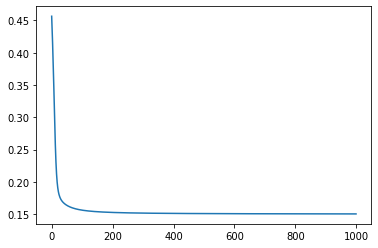

In [ ]:
plt.plot(network2.loss[1,:])

Let's see how our network does in predicting the gender of two unknown data points:

| Name   | Weight (kg) | Hight (cm) | Gender |
|--------|--------|-------|--------|
|Mary    | 9      | 0  |   f = 1   |
|John    | 10     | -3  |   m = 0   |


In [ ]:
# Predict for Mary
Mary = np.array([9, 0])  
print("Mary: %.3f" % network2.feedforward(Mary)) 

Mary: 0.246


In [ ]:
# Predict for John
John = np.array([10, -3]) 
print("John: %.3f" % network2.feedforward(John)) 

John: 0.246


In [ ]:
# Run predictions on a whole grid for all possible combinations in 45 - 95 kg, 150 - 195 cm
delta = 0.025
weight = np.arange(-15, 35, delta) # 45 - 95 kg
height = np.arange(-20, 25, delta) # 150 - 195 cm
X, Y = np.meshgrid(weight, height)
pred = np.zeros((height.size,weight.size))

for i in range(height.size):
    for j in range(weight.size):
        pred[i,j] = network2.feedforward([X[i,j], Y[i,j]])


In [ ]:
# male and female training data points
male = data*(1- np.reshape(all_y_trues, (5,1)))
female = data* np.reshape(all_y_trues, (5,1))
male = male[male != 0.0].reshape((3,2))
emale = female[female != 0.0].reshape((2,2))


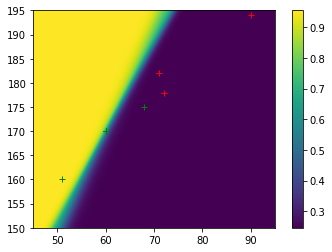

In [ ]:
# plot predictions
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
fig, ax = plt.subplots()
im = ax.imshow(pred, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[ 45, 95,150, 195])
im.set_cmap('viridis')

# plotte auch Data points
fig.colorbar(im)
plt.plot(male[:,0]+ 60,male[:,1]+ 170, 'r+')
plt.plot(female[:,0]+ 60,female[:,1]+ 170, 'g+')

plt.show()


Hm... What could have gone wrong?
 - too few data points for training 
   more free parameters in network () than data points
   --> Overfitting
 - model too complex 
   --> linear regression
 - Features not sufficient 

The above shown implementation of the neural network is just meant to be _illustrative_, to show how the network learns. Of course this is not a proper implementation, designed for efficiency. Especially the part on the derivatives is suboptimal, as you would naturally never implement out all these derivative equations explicitely by hand.... imagine having a network with hundreds of nodes in several input layers!  
For such tasks, frameworks like _autograd_ are very handy.

## Layered neural networks
So far our examples have been fairly simple: we used only 6 weights (four to connect the input layer with the hidden layer and 2 to connect the hidden layer with the output layer) and thus simply could enumerate them.
However, in large neural networks, where all neurons of one layer are in priniciple connected with all neurons of the following layer, a _matrix notation_ is much handier.

![alt text](https://github.com/DLR-SC/Neural-Network-Tutorial/raw/master/images/Network_Math.png)
We will denote the weight conneting the $i^{th}$ node of the $n^{th}$ layer to the $j^{th}$ node of the $(n+1)^{th}$ layer with $w_{ij}^{(n)}$. The corresponding bias is denoted as $b_{j}^{(n)}$. With this, the activations $h^{(n+1)}$ in the $(n+1)^{th}$ layer can be stated in a matrix equation:
$$
h^{(n+1)} = W^{(n)}\cdot h^{(n)} + \pmb{b^{(n)}} \quad with\quad W^{(n)}=\begin{bmatrix}
  w_{00}^{(n)} & ... & w_{0j}^{(n)} & ... \\
  ... & .. & .. &.. \\
  w_{i0}^{(n)}& ... & w_{ij}^{(n)} & ... \\
  ... & .. & .. &.. \\
 \end{bmatrix}
 \quad and \quad \pmb{b^{(n)}}= \begin{pmatrix} b_0^{(n)} \\ .. \\ b_j^{(n)}\\ .. \end{pmatrix}
$$


## References ##
*The calculation example with code snippets are adapted from:* <br>
https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

__Further reading:__<br>
Bishop, Christopher M. Pattern recognition and machine learning. springer, 2006.  
Bishop, Christopher M. Neural networks for pattern recognition. Oxford university press, 1995.  
<br>
https://skymind.ai/wiki/neural-network  
https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/  
http://neuralnetworksanddeeplearning.com/chap1.html  
https://www.youtube.com/watch?v=aircAruvnKk  
